# 2. Quickly Exploring Data
## 2.1  Creating a Scatter Plot    

In [ ]:
# 方法一: plot
plot(mtcars$wt, mtcars$mpg)
# 方法二: ggplot2::qplot 
#library(ggplot2)
ggplot2::qplot(mtcars$wt, mtcars$mpg) # 或者 qplot(wt, mpg, data=mtcars) 此方法要求两个变量在同一个数据集中
# 方法三： ggplot2::ggplot()+geom_point()
ggplot(mtcars, aes(x=wt, y=mpg)) + geom_point()

## 2.2 creating a line graph

In [ ]:
plot(pressure$temperature,pressure$pressure,type="l")
# 也可以使用 ggplot2
ggplot2::qplot(pressure$temperature, pressure$pressure, geom="line")
# 或者
ggplot2::ggplot(pressure,aes(x=temperature,y=pressure))+geom_line()
# ===
# 如果想在同一幅图中加入更多的线图或者点图，则可以直接添加 lines() 和 points() 
plot(pressure$temperature,pressure$pressure,type="l")
points(pressure$temperature,pressure$pressure)
lines(pressure$temperature,pressure$pressure/2,col='red')
points(pressure$temperature,pressure$pressure/2,col='red')
# 相应 ggplot2 版本
ggplot2::qplot(temperature,pressure,data=pressure,geom=c('line','point'))
# equivalent to
ggplot2::ggplot(pressure,aes(x=temperature,y=pressure))+geom_line()+geom_point()

## 2.3 creating a Bar graph

In [ ]:
#options(warn=-1)
# 不同数据集使用不同方法，BOD$demand 类似一个归总数据，而mtcars$cyl需要先归总
barplot(BOD$demand,names.arg=BOD$Time) #names.arg 指定横轴标记
barplot(table(mtcars$cyl)) 
# 使用 ggplot2
#library(ggplot2)
# 报错，因为涉及stat参数，故此处不推荐使用qplot: qplot(factor(BOD$Time),BOD$demand,geom="bar",stat="identity") # convert the x variable to a factor, so that it is treated as discrete
qplot(mtcars$cyl) # 更好使用 qplot(factor(mtcars$cyl))
# 或者使用
# 报错，此处不推荐使用qplot: qplot(Time,demand,data=BOD,geom="bar") # 报错
ggplot(BOD,aes(x=Time,y=demand))+geom_bar(stat="identity")

## 2.4 creating a histogram

In [ ]:
hist(mtcars$mpg)
hist(mtcars$mpg,breaks=10)
# ggplot2
qplot(mtcars$mpg)# 等价于 qplot(mtcars$mpg,binwidth=1)
qplot(mpg,data=mtcars,binwidth=4) # 等价于 ggplot(mtcars,aes(x=mpg))+geom_histogram(binwidth=4)

# 2.5 creating a box plot

In [ ]:
plot(ToothGrowth$supp,ToothGrowth$len) # 数据的原因（a factor of x values and a vector of y values），使得简单实用plot就可以画出box图
boxplot(len~supp,data=ToothGrowth)
# ggplot2
qplot(ToothGrowth$supp,ToothGrowth$len,geom="boxplot")
qplot(supp,len,data=ToothGrowth,geom="boxplot")# 等价于 ggplot(ToothGrowth,aes(x=supp,y=len))+geom_boxplot()

In [ ]:
# it's also possible to make box plots for multiple variables,by combining the variables with "interaction()"
qplot(interaction(ToothGrowth$supp,ToothGrowth$dose),ToothGrowth$len,geom="boxplot")
qplot(interaction(supp,dose),len,data=ToothGrowth,geom="boxplot")
ggplot(ToothGrowth,aes(x=interaction(supp,dose),y=len))+geom_boxplot()

# 2.6 plotting a function curve

In [ ]:
# use "curve()" and pass it an expression with the variable x
curve(x^3-5*x,from=-4,to=4)
# 或者是自定义的function
myfun<-function(x){
    1/(exp(-x+10))
}
curve(myfun(x),from=0,to=20)
curve(1-myfun(x),add=TRUE,col="red") # add a line
# ggplot2
ggplot(data.frame(x=c(0,20)),aes(x=x))+stat_function(fun=myfun,geom="line") # 注意，似乎此处的data.frame必不可少


# 3. Bar Graphs
## 3.1 making a basic bar graph

In [ ]:
library(gcookbook) # for the dataset
library(ggplot2)
ggplot(pg_mean,aes(x=group,y=weight))+
    geom_bar(stat="identity")
# 当x轴变量是连续的时候，可能会导致图形的不连续，因为有些x值上没有数据；此时要使用 factor() 将其转化。
ggplot(BOD,aes(x=Time,y=demand))+
    geom_bar(stat="identity")

ggplot(BOD,aes(x=factor(Time),y=demand))+
    geom_bar(stat="identity")

# ggplot函数中控制填充颜色和bar的边框颜色
ggplot(pg_mean,aes(x=group,y=weight))+
    geom_bar(stat="identity",fill="lightblue",color="black")

## 3.2 grouping bar together
* 使用参数 position="dodge"

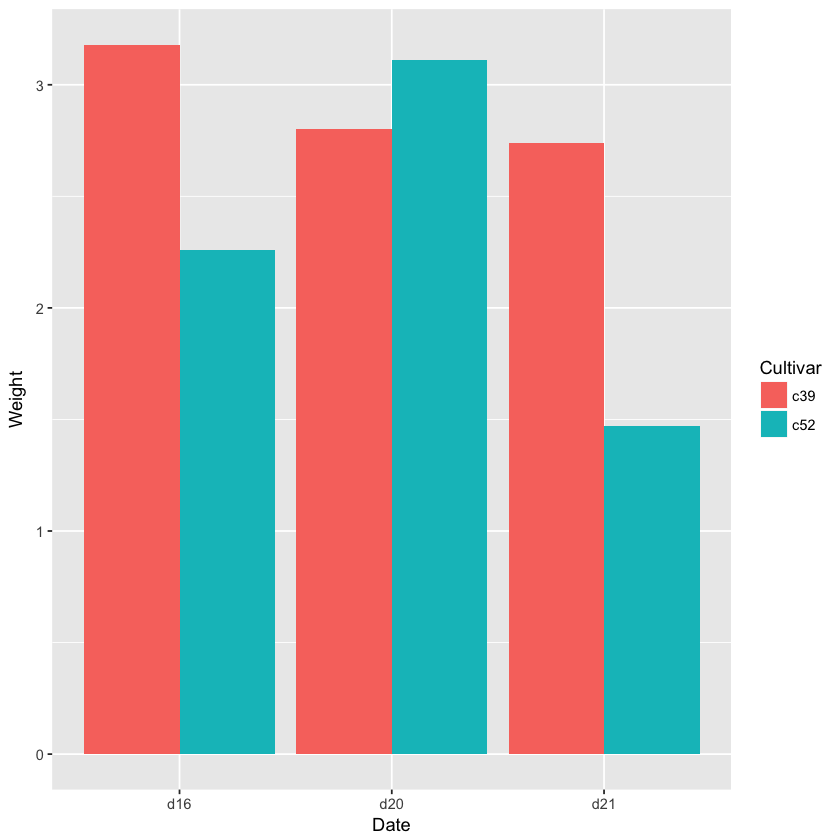

In [28]:
ggplot(cabbage_exp,aes(x=Date,y=Weight,fill=Cultivar))+
    geom_bar(stat="identity",position="dodge") # stat和position参数各指什么？？？

In [ ]:
?ggplot

In [ ]:
ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) + geom_bar(stat="identity",position = "dodge")